<a href="https://www.kaggle.com/code/mirzaabbasuddin/multiple-linear-regression?scriptVersionId=134390985" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd

In [2]:
# loading the dataset
df = pd.read_csv('/kaggle/input/kc-house-dataset-home-prices/kc_house_data.csv')
df.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1230000.0,4,5,5420,101930,1.0,0,0,...,11,3890.0,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2,1715,6819,2.0,0,0,...,7,1715.0,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,2,1060,9711,1.0,0,0,...,7,1060.0,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1,1780,7470,1.0,0,0,...,7,1050.0,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,3,1890,6560,2.0,0,0,...,7,1890.0,0,2003,0,98038,47.3684,-122.031,2390,7570


**Data Processing**

In [3]:
df.shape

(21613, 21)

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1230000.0,4,5,5420,101930,1.0,0,0,3,11,3890.0,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2,1715,6819,2.0,0,0,3,7,1715.0,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,2,1060,9711,1.0,0,0,3,7,1060.0,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1,1780,7470,1.0,0,0,3,7,1050.0,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,3,1890,6560,2.0,0,0,3,7,1890.0,0,2003,0,98038,47.3684,-122.031,2390,7570


In [6]:
df['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [7]:
df['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [8]:
# removing unnecessay column
df.drop(columns = ['id','date','zipcode'],inplace = True)

In [9]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1,770,10000,1.0,0,0,3,6,770.0,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,3,1530,1131,3.0,0,0,3,8,1530.0,0,2009,0,47.6993,-122.346,1530,1509
21609,400000.0,4,3,2310,5813,2.0,0,0,3,8,2310.0,0,2014,0,47.5107,-122.362,1830,7200
21610,402101.0,2,1,1020,1350,2.0,0,0,3,7,1020.0,0,2009,0,47.5944,-122.299,1020,2007
21611,400000.0,3,3,1600,2388,2.0,0,0,3,8,1600.0,0,2004,0,47.5345,-122.069,1410,1287


*Dealing with missing values*

In [10]:
for column in df.columns:
    print(df[column].isna().value_counts())

False    21613
Name: price, dtype: int64
False    21613
Name: bedrooms, dtype: int64
False    21613
Name: bathrooms, dtype: int64
False    21613
Name: sqft_living, dtype: int64
False    21613
Name: sqft_lot, dtype: int64
False    21613
Name: floors, dtype: int64
False    21613
Name: waterfront, dtype: int64
False    21613
Name: view, dtype: int64
False    21613
Name: condition, dtype: int64
False    21613
Name: grade, dtype: int64
False    21611
True         2
Name: sqft_above, dtype: int64
False    21613
Name: sqft_basement, dtype: int64
False    21613
Name: yr_built, dtype: int64
False    21613
Name: yr_renovated, dtype: int64
False    21613
Name: lat, dtype: int64
False    21613
Name: long, dtype: int64
False    21613
Name: sqft_living15, dtype: int64
False    21613
Name: sqft_lot15, dtype: int64


In [11]:
# grade column contains 2 missing values let's handle that
mean_value = df['grade'].mean()
df['grade'].fillna(mean_value,inplace = True)

In [12]:
df['grade'].isna().value_counts()

False    21613
Name: grade, dtype: int64

**Graphical representation of columns with the price column to see the scatter relationship**

In [13]:
import matplotlib.pyplot as plt

In [14]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

*Analyzing first 6 columns*

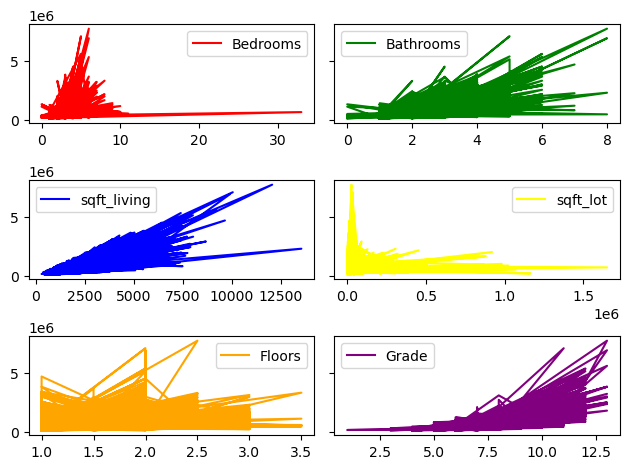

In [15]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2,sharey = True)

colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple']

ax1.plot(df['bedrooms'],df['price'],label = 'Bedrooms', color = colors[0])
ax1.legend()

ax2.plot(df['bathrooms'],df['price'],label = 'Bathrooms', color = colors[1])
ax2.legend()

ax3.plot(df['sqft_living'],df['price'],label = 'sqft_living', color = colors[2])
ax3.legend()

ax4.plot(df['sqft_lot'],df['price'],label = 'sqft_lot', color = colors[3])
ax4.legend()

ax5.plot(df['floors'],df['price'],label = 'Floors', color = colors[4])
ax5.legend()

ax6.plot(df['grade'],df['price'],label = 'Grade', color = colors[5])
ax6.legend()

plt.subplots_adjust(hspace=0.4)
fig.tight_layout()
plt.show()

*Calculate correlation coefficients*

In [16]:
import numpy as np

correlations = []
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade']
target = 'price'

for feature in features:
    correlation = np.corrcoef(df[feature], df[target])[0, 1]
    correlations.append(correlation)

correlations

[0.30833836868809633,
 0.47531651250698725,
 0.7020437212325268,
 0.08965520771082384,
 0.256785704975512,
 0.6674627402178578]

In [17]:
threshold = 0.5
significant_features = []

for feature, correlation in zip(features, correlations):
    if abs(correlation) > threshold:
        significant_features.append(feature)

print("Significant Features:", significant_features)

Significant Features: ['sqft_living', 'grade']


In [18]:
# calulatiing corelation coefficients of all feature

columns = df.columns
features = columns[1:]
target = columns[0]

In [19]:
significant_features = []
threshold = 0.5
for feature in features:
    corelation = np.corrcoef(df[feature],df[target])[0,1]
    if(corelation >= threshold):
        significant_features.append(feature)
        
significant_features

['sqft_living', 'grade', 'sqft_living15']

In [20]:
# dropping all the feature/columns except those significants

for feature in features:
    if feature not in significant_features:
        df.drop(columns = feature,inplace = True)

In [21]:
df

,price,sqft_living,grade,sqft_living15
0,221900.0,1180,7,1340
1,538000.0,2570,7,1690
2,180000.0,770,6,2720
3,604000.0,1960,7,1360
4,510000.0,1680,8,1800
...,...,...,...,...
21608,360000.0,1530,8,1530
21609,400000.0,2310,8,1830
21610,402101.0,1020,7,1020
21611,400000.0,1600,8,1410


In [22]:
# grabbing the X and Y column, here we want to predict the price so, price column will be our Y
X = df[['sqft_living','grade','sqft_living15']]
Y = df['price']

In [23]:
X

,sqft_living,grade,sqft_living15
0,1180,7,1340
1,2570,7,1690
2,770,6,2720
3,1960,7,1360
4,1680,8,1800
...,...,...,...
21608,1530,8,1530
21609,2310,8,1830
21610,1020,7,1020
21611,1600,8,1410


In [24]:
Y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

**Spliting the dataset into train and test**

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 10)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(17290, 3)
(4323, 3)
(17290,)
(4323,)


**Training the model with train data**

In [28]:
from sklearn import linear_model

model = linear_model.LinearRegression()

In [29]:
model.fit(X_train,Y_train)

LinearRegression()

In [30]:
model.predict([[1000,5,3000]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([121474.55336716])

**Testing the model with test data**

In [31]:
predicted_output = model.predict(X_test)
predicted_output

array([ 475861.53045259,  502600.64624306, -429281.61690015, ...,
        963302.53294332,  399300.21406321,  490113.41676291])

**Plotting visual representation to see the difference of actual output and predicted output**

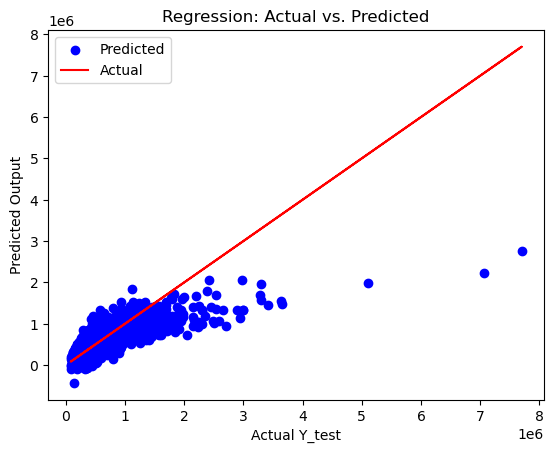

In [32]:
# Plotting the regression
plt.scatter(Y_test, predicted_output, color='blue', label='Predicted')
plt.plot(Y_test, Y_test, color='red', label='Actual')

plt.xlabel('Actual Y_test')
plt.ylabel('Predicted Output')
plt.title('Regression: Actual vs. Predicted')
plt.legend()
plt.show()

In [33]:
model.score(X_test,Y_test)

0.5265008809765201